In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns

In [2]:
df = pd.read_csv("ANZ synthesised transaction dataset.csv")

In [3]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [4]:
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries

In [5]:
df_cus = df.groupby("customer_id").mean()
df_cus.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


In [6]:
N_train = int(len(df_cus)*0.8)
X_train = df_cus.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = df_cus["annual_salary"].iloc[:N_train]
X_test = df_cus.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = df_cus["annual_salary"].iloc[N_train:]

In [7]:
linear_reg = LinearRegression()

In [8]:
linear_reg.fit(X_train, Y_train)
linear_reg.score(X_train, Y_train)

0.23295376366257825

In [9]:
linear_reg.predict(X_test)

array([1993.98473311, 2867.39066481, 1944.95959591, 1806.85984885,
       2226.35045442, 2075.34697175, 1813.02987337, 5388.67435983,
       1902.35351608, 2191.90445145, 1713.48134178, 2854.40519949,
       2094.77781158, 3815.34342881, 2249.92922822, 1768.80816189,
       2095.02988288, 1515.18425875, 1782.72752537, 2481.2898546 ])

In [10]:
linear_reg.score(X_test, Y_test)

-0.31694234980747327

In [11]:
df_cus[['age','annual_salary']].corr()

,age,annual_salary
age,1.000000,-0.135227
annual_salary,-0.135227,1.000000


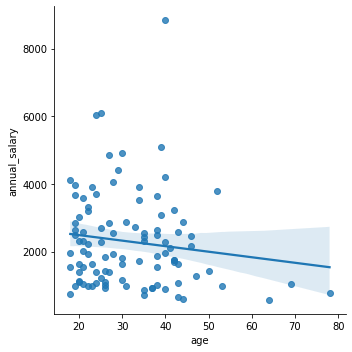

In [14]:
sns.lmplot(x='age',y='annual_salary',data=df_cus)

In [15]:
df_cat = df[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [16]:
pd.get_dummies(df_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [17]:
N_train = int(len(df)*0.8)
X_train = pd.get_dummies(df_cat).iloc[:N_train]
Y_train = df["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(df_cat).iloc[N_train:]
Y_test = df["annual_salary"].iloc[N_train:]

In [18]:
decision_tree_class = DecisionTreeClassifier()

In [19]:
decision_tree_class.fit(X_train, Y_train)
decision_tree_class.score(X_train, Y_train)

0.7882499481004774

In [20]:
decision_tree_class.predict(X_test)

array([1013, 1043, 4132, ..., 4054, 1043,  996], dtype=int64)

In [21]:
decision_tree_class.score(X_test, Y_test)

0.755085097550851

In [22]:
decision_tree_reg = DecisionTreeRegressor()

In [23]:
decision_tree_reg.fit(X_train, Y_train)
decision_tree_reg.score(X_train, Y_train)

0.7468978726536879

In [24]:
decision_tree_reg.predict(X_test)

array([1226.42857143, 1043.        , 4132.        , ..., 3345.04761905,
       1043.        , 1626.        ])

In [25]:
decision_tree_reg.score(X_test, Y_test)

0.6730992707479186